# Import Libraries

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix

**Load and explore dataset**

In [7]:
df=pd.read_csv("mldata_0023110109.csv")

In [8]:
df

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0,1,-0.007102,-1.495505,2.811541,2.258446,1.611582,-1.281962,1.856293,0.036157,...,2.663514,-0.594969,-1.008841,-1.205632,-0.389114,-0.315125,1.438460,-2.064359,0.738343,0.003931
1,1,2,0.077781,0.950124,2.691452,2.244297,0.897916,1.099446,2.516375,-0.876849,...,-1.037425,0.389940,1.766555,-0.598686,-0.079378,0.219674,-0.357721,-0.206544,-0.039062,0.545900
2,2,3,0.398358,2.788386,-1.482003,4.571134,0.795322,0.502673,1.510249,3.933450,...,1.271939,1.367288,0.565421,0.887217,-0.729693,-1.800953,-0.723258,-1.103136,-3.943680,0.568451
3,3,3,0.229399,0.167448,0.472539,2.071365,-0.771787,1.776110,2.551300,0.709926,...,1.006360,1.387186,0.302793,-1.265026,-1.399970,-0.142476,-1.355194,0.375409,0.312378,0.301458
4,4,3,-0.325626,0.810059,-0.493111,0.319434,-0.498835,-0.667839,-1.094436,-0.329853,...,0.270913,-1.903982,0.760312,0.887887,-4.670986,-0.663105,0.153642,2.401100,-1.862010,-0.207597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,0,0.018826,4.329350,3.868007,-0.870671,0.478079,1.888580,-0.613142,2.694096,...,-1.074605,-0.371873,-0.522702,0.534830,-3.590934,-2.373014,-1.781138,0.148067,-3.688417,0.545185
1196,1196,0,-0.691772,1.942389,1.935363,-1.989590,0.146770,-0.038988,1.780340,0.744239,...,0.623785,0.388176,-0.013541,-0.268675,-0.292825,2.030066,-0.545196,2.128118,2.443364,-0.374858
1197,1197,1,0.639958,-4.491728,-0.834309,2.990794,-0.662993,-0.817989,-0.552495,0.347752,...,-1.409459,1.129122,1.261126,0.225904,-0.826506,-1.077688,0.617700,-0.178483,-1.297678,0.551430
1198,1198,0,-0.840314,3.183811,5.021159,1.329345,-0.751613,1.793804,5.286350,1.881311,...,-1.765433,0.006688,1.664960,-0.186203,3.476975,-1.023888,0.698213,0.638755,-1.117310,0.022132


In [9]:
df.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,1.469167,0.117602,0.053080,0.858748,0.916598,0.135852,0.098291,0.634282,0.618737,...,0.104342,0.126327,0.099009,0.133635,-0.105937,0.030882,0.079327,0.308804,-0.390402,0.074940
std,346.554469,1.120310,0.990145,2.006679,1.773528,1.834116,1.010911,0.997304,1.800271,1.680771,...,1.005066,0.992463,0.970016,0.974397,1.894181,1.976588,0.977974,1.905322,2.966674,1.012032
min,0.000000,0.000000,-2.892781,-7.561217,-5.145172,-5.111851,-2.975073,-2.712155,-5.510770,-4.425500,...,-3.099573,-3.247029,-3.251687,-3.534506,-5.402578,-5.607474,-3.106308,-6.576832,-9.365237,-3.607378
25%,299.750000,0.000000,-0.534071,-1.249982,-0.301477,-0.376550,-0.560230,-0.611626,-0.536117,-0.520285,...,-0.608562,-0.562643,-0.580476,-0.548546,-1.475207,-1.376099,-0.576624,-0.910655,-2.414628,-0.602923
50%,599.500000,1.000000,0.115484,0.139841,0.945613,1.044713,0.111075,0.092822,0.758787,0.684423,...,0.085309,0.146385,0.096498,0.165402,-0.133918,-0.128473,0.067016,0.381350,-0.752350,0.090705
75%,899.250000,2.000000,0.771297,1.313204,2.099643,2.118558,0.832289,0.791462,1.829624,1.770561,...,0.768863,0.795066,0.773857,0.791629,1.115174,1.312940,0.764861,1.633195,1.625857,0.744117
max,1199.000000,3.000000,3.425533,6.500337,6.269267,7.304405,3.776382,3.065338,6.708079,5.808273,...,3.478039,3.546812,3.359412,3.683432,6.054122,7.128634,2.551570,6.928228,11.770806,3.497170


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1200 non-null   int64  
 1   label       1200 non-null   int64  
 2   feature_1   1200 non-null   float64
 3   feature_2   1200 non-null   float64
 4   feature_3   1200 non-null   float64
 5   feature_4   1200 non-null   float64
 6   feature_5   1200 non-null   float64
 7   feature_6   1200 non-null   float64
 8   feature_7   1200 non-null   float64
 9   feature_8   1200 non-null   float64
 10  feature_9   1200 non-null   float64
 11  feature_10  1200 non-null   float64
 12  feature_11  1200 non-null   float64
 13  feature_12  1200 non-null   float64
 14  feature_13  1200 non-null   float64
 15  feature_14  1200 non-null   float64
 16  feature_15  1200 non-null   float64
 17  feature_16  1200 non-null   float64
 18  feature_17  1200 non-null   float64
 19  feature_18  1200 non-null  

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20'],
      dtype='object')

**spliting into X and y**

In [12]:
X=df.iloc[:,2:23]
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,-0.007102,-1.495505,2.811541,2.258446,1.611582,-1.281962,1.856293,0.036157,-1.614334,0.103852,2.663514,-0.594969,-1.008841,-1.205632,-0.389114,-0.315125,1.438460,-2.064359,0.738343,0.003931
1,0.077781,0.950124,2.691452,2.244297,0.897916,1.099446,2.516375,-0.876849,-1.480021,1.000674,-1.037425,0.389940,1.766555,-0.598686,-0.079378,0.219674,-0.357721,-0.206544,-0.039062,0.545900
2,0.398358,2.788386,-1.482003,4.571134,0.795322,0.502673,1.510249,3.933450,0.302045,-1.091761,1.271939,1.367288,0.565421,0.887217,-0.729693,-1.800953,-0.723258,-1.103136,-3.943680,0.568451
3,0.229399,0.167448,0.472539,2.071365,-0.771787,1.776110,2.551300,0.709926,-1.281920,0.523350,1.006360,1.387186,0.302793,-1.265026,-1.399970,-0.142476,-1.355194,0.375409,0.312378,0.301458
4,-0.325626,0.810059,-0.493111,0.319434,-0.498835,-0.667839,-1.094436,-0.329853,-0.354676,-1.458623,0.270913,-1.903982,0.760312,0.887887,-4.670986,-0.663105,0.153642,2.401100,-1.862010,-0.207597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.018826,4.329350,3.868007,-0.870671,0.478079,1.888580,-0.613142,2.694096,-0.013877,-0.460928,-1.074605,-0.371873,-0.522702,0.534830,-3.590934,-2.373014,-1.781138,0.148067,-3.688417,0.545185
1196,-0.691772,1.942389,1.935363,-1.989590,0.146770,-0.038988,1.780340,0.744239,-0.123446,1.478479,0.623785,0.388176,-0.013541,-0.268675,-0.292825,2.030066,-0.545196,2.128118,2.443364,-0.374858
1197,0.639958,-4.491728,-0.834309,2.990794,-0.662993,-0.817989,-0.552495,0.347752,0.018067,0.846783,-1.409459,1.129122,1.261126,0.225904,-0.826506,-1.077688,0.617700,-0.178483,-1.297678,0.551430
1198,-0.840314,3.183811,5.021159,1.329345,-0.751613,1.793804,5.286350,1.881311,0.257839,-1.690692,-1.765433,0.006688,1.664960,-0.186203,3.476975,-1.023888,0.698213,0.638755,-1.117310,0.022132


In [13]:
y=df.iloc[:,1]
y

0       1
1       2
2       3
3       3
4       3
       ..
1195    0
1196    0
1197    1
1198    0
1199    3
Name: label, Length: 1200, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(840, 20) (360, 20) (840,) (360,)


# Apply Machine Learning Models 

**SGDClassifier**

In [16]:
lg=SGDClassifier()
lg.fit(x_train,y_train)
y_pred_lg=lg.predict(x_test)
acc_lg=accuracy_score(y_test,y_pred_lg)
print('accuracy score of sgd:',acc_lg)


accuracy score of sgd: 0.5166666666666667


**Confusion matrics classification report heatmap**

confusion matric of sophistic gradeint: [[43 13 14 23]
 [ 7 34  5 28]
 [14  7 49 23]
 [14 15 11 60]]
classification report of sophistic gradeint:               precision    recall  f1-score   support

           0       0.55      0.46      0.50        93
           1       0.49      0.46      0.48        74
           2       0.62      0.53      0.57        93
           3       0.45      0.60      0.51       100

    accuracy                           0.52       360
   macro avg       0.53      0.51      0.52       360
weighted avg       0.53      0.52      0.52       360



[Text(0.5, 1.0, 'report of sophistic gradeint')]

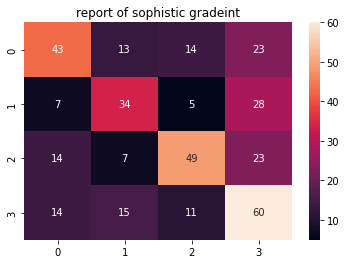

In [19]:
cm_sgd=confusion_matrix(y_test,y_pred_lg)
print("confusion matric of sophistic gradeint:",cm_sgd)
cf_sgd=classification_report(y_test,y_pred_lg)
print("classification report of sophistic gradeint:",cf_sgd)
sns.heatmap(data=cm_sgd,annot=True).set(title='report of sophistic gradeint')

**RandomForestClassifier**

In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
acc_rf=accuracy_score(y_test,y_pred_rf)
print("accuracy score of random forest classifier:",acc_rf)

accuracy score of random forest classifier: 0.7333333333333333


**Confusion matrics classification report heatmap**

confusion matric of random forest: [[70  2  9 12]
 [ 3 60  5  6]
 [14  8 68  3]
 [ 8 17  9 66]]
classification report of random forest:               precision    recall  f1-score   support

           0       0.74      0.75      0.74        93
           1       0.69      0.81      0.75        74
           2       0.75      0.73      0.74        93
           3       0.76      0.66      0.71       100

    accuracy                           0.73       360
   macro avg       0.73      0.74      0.73       360
weighted avg       0.74      0.73      0.73       360



[Text(0.5, 1.0, 'report of random forest')]

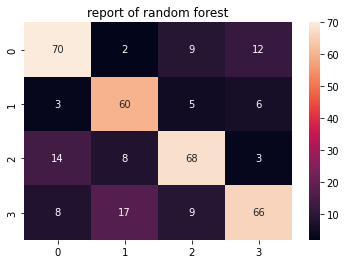

In [25]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
print("confusion matric of random forest:",cm_rf)
cf_rf=classification_report(y_test,y_pred_rf)
print("classification report of random forest:",cf_rf)
sns.heatmap(data=cm_rf,annot=True).set(title='report of random forest')

In [20]:
br=BernoulliNB()
br.fit(x_train,y_train)
y_pred_br=br.predict(x_test)
acc_br=accuracy_score(y_test,y_pred_br)
print('accuracy score of bernoullinb:',acc_br)

accuracy score of bernoullinb: 0.5194444444444445


**Confusion matrics classification report heatmap**

confusion matric of bernoulliinb: [[52  7 12 22]
 [ 8 35 11 20]
 [18 15 49 11]
 [20 12 17 51]]
classification report of bernoullinb:               precision    recall  f1-score   support

           0       0.53      0.56      0.54        93
           1       0.51      0.47      0.49        74
           2       0.55      0.53      0.54        93
           3       0.49      0.51      0.50       100

    accuracy                           0.52       360
   macro avg       0.52      0.52      0.52       360
weighted avg       0.52      0.52      0.52       360



[Text(0.5, 1.0, 'report of bernoullinb')]

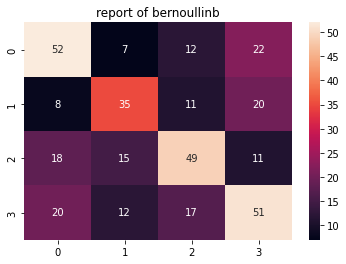

In [26]:
cm_br=confusion_matrix(y_test,y_pred_br)
print('confusion matric of bernoulliinb:',cm_br)
cf_br=classification_report(y_test,y_pred_br)
print("classification report of bernoullinb:",cf_br)
sns.heatmap(data=cm_br,annot=True).set(title='report of bernoullinb')

# Hyperparameter Tuning With GridSearchCV

**SGDClassifier**

In [22]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model= SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)
clf.fit(x_train, y_train)
score=clf.best_score_
print("grid search of sgd:",score)

C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration rea

C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


grid search of sgd: 0.6011904761904762


In [23]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.01, loss='log', penalty='l1')


# Accuracy Camparsion B/W Models

In [27]:
data={'SGD':acc_lg,'RFC':acc_rf,'BNB':acc_br,'SGD_Tune:',score}
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names,color ='Blue',width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title("Accuracy Camparsion B/W Models")
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_12136/3974576430.py, line 1)